
## Bank Personal loan modelling
With 13 predictor variables we need to predict whether a particular customer will opt for personal loan or not. Logistic regression method was used to analyse the data of 5000 customers

### Step:1 Importing the data

In [122]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [123]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np

In [126]:
# Importing  dataset
personalloan_data = pd.read_csv("Bank_Personal_Loan_Modelling - Copy.csv")
personalloan_data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


### Step 2: Inspecting the Dataframe

In [125]:
# Let's see the head of our master dataset
personalloan_data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [7]:
# Let's check the dimensions of the dataframe
personalloan_data.shape
#len(personalloan_data)

(5000, 14)

In [127]:
# let's look at the statistical aspects of the dataframe
personalloan_data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [128]:
# Let's see the type of each column
personalloan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


### Step 3: Data Preparation

In [129]:
#dropping zipcode as it is not ncessary for model building
personalloan_data=personalloan_data.drop(['ZIP Code'],1)

In [130]:
personalloan_data.head()

,ID,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,4,1.0,2,0,0,0,0,0,1


#### Checking for Outliers

In [131]:
# Checking for outliers in the continuous variables
personalloan_data1 = personalloan_data[['Age','Experience','Income','CCAvg','Mortgage']]

In [132]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
personalloan_data1.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Age,Experience,Income,CCAvg,Mortgage
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,1.937938,56.498800
std,11.463166,11.467954,46.033729,1.747659,101.713802
min,23.000000,-3.000000,8.000000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,0.700000,0.000000
50%,45.000000,20.000000,64.000000,1.500000,0.000000
75%,55.000000,30.000000,98.000000,2.500000,101.000000
90%,61.000000,36.000000,145.000000,4.300000,200.000000
95%,63.000000,38.000000,170.000000,6.000000,272.000000
99%,65.000000,41.000000,193.000000,8.000000,431.010000


From the distribution shown above, you can see that there no outliers in your data. The numbers are gradually increasing.

#### Checking for Missing Values and Inputing Them

In [133]:
# Adding up the missing values (column-wise)
personalloan_data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

### Step 4: Test-Train Split

In [134]:
from sklearn.model_selection import train_test_split

In [135]:
# Putting feature variable to X
X = personalloan_data.drop(['Personal Loan','ID'], axis=1)

X.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,1,0,0,0
1,45,19,34,3,1.5,1,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,1


In [136]:
# Putting response variable to y
y = personalloan_data['Personal Loan']

y.head()

0    0
1    0
2    0
3    0
4    0
Name: Personal Loan, dtype: int64

In [137]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Step 5: Feature Scaling

In [138]:
from sklearn.preprocessing import StandardScaler

In [139]:
scaler = StandardScaler()

X_train[['Age','Experience','Income','CCAvg','Mortgage']] = scaler.fit_transform(X_train[['Age','Experience','Income','CCAvg','Mortgage']])

X_train.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
4966,-0.385787,-0.275194,-0.860819,1,-0.703098,1,0.876406,0,0,0,0
4086,0.403579,0.513723,-1.363244,4,-0.989435,1,-0.558751,1,0,0,0
2881,0.315871,0.426065,-0.402083,4,-1.046702,3,-0.558751,0,0,1,0
1237,-0.648908,-0.625824,2.088196,1,2.790212,3,-0.558751,0,1,1,1
1429,-1.262859,-1.327084,-0.838975,1,-0.760365,3,1.157416,0,0,0,0


In [140]:
### Checking the personal loan willing Rate
PL = (sum(personalloan_data['Personal Loan'])/len(personalloan_data['Personal Loan'].index))*100
PL

9.6

We have almost 9.6% people willing to take personla loan

### Step 6: Looking at Correlations

In [141]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

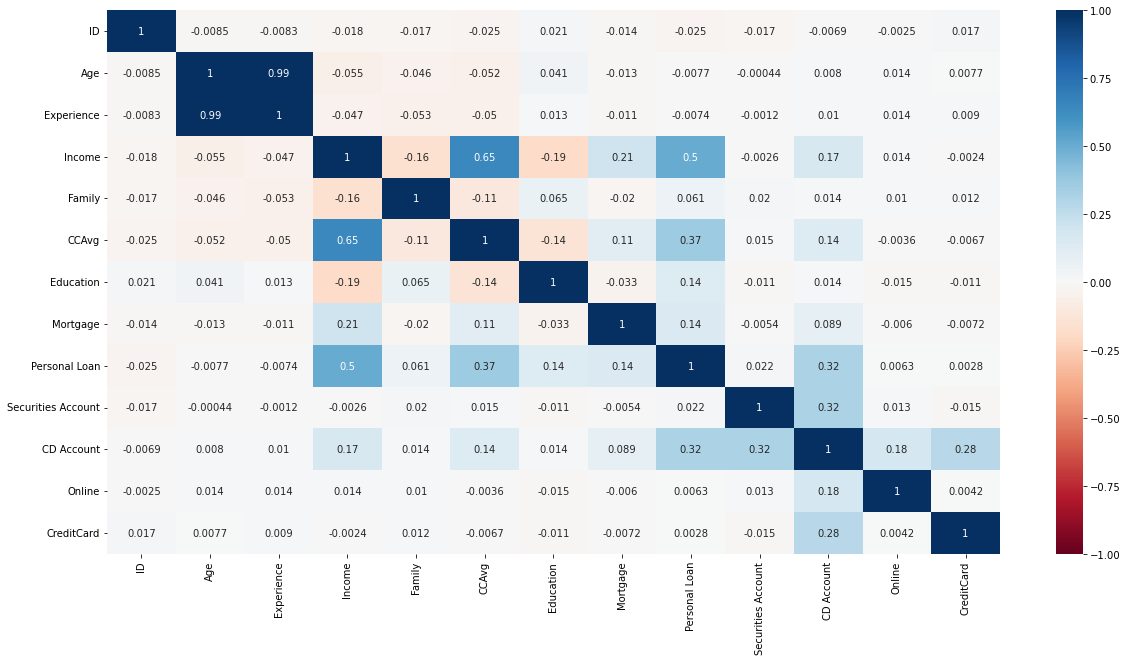

In [142]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(personalloan_data.corr(),cmap='RdBu',vmin=-1,vmax=1,annot = True)
plt.show()

### Step 7: Model Building

In [143]:
import statsmodels.api as sm

In [144]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 3500
Model:                            GLM   Df Residuals:                     3488
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -425.96
Date:                Sat, 14 Jan 2023   Deviance:                       851.92
Time:                        09:06:43   Pearson chi2:                 7.92e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.3099
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -9.4849      0.524    -18.106      0.000     -10.512      -8.458
Age                   -0.5228      0.831     -0.629      0.529      -2.152       1.106
Experience             0.7418      0.826      0.898      0.369      -0.878       2.362
Income                 2.6274      0.149     17.588      0.000       2.335       2.920
Family                 0.6983      0.091      7.681      0.000       0.520       0.877
CCAvg                  0.2098      0.085      2.478      0.013       0.044       0.376
Education              1.8812      0.144     13.046      0.000       1.599       2.164
Mortgage               0.0764      0.069      1.114      0.265      -0.058       0.211
Securities Account    -0.5995      0.330     -1.818      0.069      -1.246       0.047
CD Account             3.4901      0.383      9.113      0.000       2.739       4.241
Online                -0.9644      0.195     -4.941      0.000      -1.347      -0.582
CreditCard            -0.9188      0.241     -3.819      0.000      -1.390      -0.447
======================================================================================
"""

### Step 8: Feature Selection Using RFE

In [145]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [146]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=5)             # running RFE with 5 variables as output
rfe = rfe.fit(X_train, y_train)

In [147]:
rfe.support_

array([False, False,  True, False, False,  True, False, False,  True,
        True,  True])

In [148]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Age', False, 6),
 ('Experience', False, 4),
 ('Income', True, 1),
 ('Family', False, 2),
 ('CCAvg', False, 5),
 ('Education', True, 1),
 ('Mortgage', False, 7),
 ('Securities Account', False, 3),
 ('CD Account', True, 1),
 ('Online', True, 1),
 ('CreditCard', True, 1)]

In [149]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=8)             # running RFE with 8 variables as output
rfe = rfe.fit(X_train, y_train)

In [150]:
rfe.support_

array([False,  True,  True,  True, False,  True, False,  True,  True,
        True,  True])

In [151]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Age', False, 3),
 ('Experience', True, 1),
 ('Income', True, 1),
 ('Family', True, 1),
 ('CCAvg', False, 2),
 ('Education', True, 1),
 ('Mortgage', False, 4),
 ('Securities Account', True, 1),
 ('CD Account', True, 1),
 ('Online', True, 1),
 ('CreditCard', True, 1)]

In [152]:
col = X_train.columns[rfe.support_]

In [153]:
X_train.columns[~rfe.support_]

Index(['Age', 'CCAvg', 'Mortgage'], dtype='object')

##### Assessing the model with StatsModels

In [154]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 3500
Model:                            GLM   Df Residuals:                     3491
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -429.63
Date:                Sat, 14 Jan 2023   Deviance:                       859.26
Time:                        09:08:04   Pearson chi2:                 8.46e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.3084
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -9.3173      0.513    -18.170      0.000     -10.322      -8.312
Experience             0.2022      0.090      2.254      0.024       0.026       0.378
Income                 2.7512      0.142     19.330      0.000       2.472       3.030
Family                 0.6883      0.090      7.608      0.000       0.511       0.866
Education              1.8197      0.139     13.085      0.000       1.547       2.092
Securities Account    -0.6052      0.329     -1.838      0.066      -1.251       0.040
CD Account             3.5225      0.383      9.193      0.000       2.772       4.274
Online                -0.9327      0.193     -4.823      0.000      -1.312      -0.554
CreditCard            -0.9370      0.240     -3.902      0.000      -1.408      -0.466
======================================================================================
"""

In [155]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

4966    0.000098
4086    0.000124
2881    0.044890
1237    0.983722
1429    0.003184
2530    0.011993
2937    0.001144
283     0.001030
966     0.017317
4847    0.002729
dtype: float64

In [156]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([9.77310697e-05, 1.23861550e-04, 4.48896154e-02, 9.83722328e-01,
       3.18431551e-03, 1.19926754e-02, 1.14362977e-03, 1.02969895e-03,
       1.73166452e-02, 2.72893877e-03])

##### Creating a dataframe with the actual churn flag and the predicted probabilities

In [157]:
y_train_pred_final = pd.DataFrame({'Personal Loan':y_train.values, 'Personal Loan_Prob':y_train_pred})
y_train_pred_final['ID'] = y_train.index
y_train_pred_final.head()

,Personal Loan,Personal Loan_Prob,ID
0,0,0.000098,4966
1,0,0.000124,4086
2,0,0.044890,2881
3,1,0.983722,1237
4,0,0.003184,1429


##### Creating new column 'predicted' with 1 if Personal Loan_Prob > 0.5 else 0

In [158]:

y_train_pred_final['predicted']=list(map(lambda x: 1 if x > 0.5 else 0, y_train_pred_final['Personal Loan_Prob']))
#y_train_pred_final['predicted'] = y_train_pred_final.Personal Loan_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Personal Loan,Personal Loan_Prob,ID,predicted
0,0,0.000098,4966,0
1,0,0.000124,4086,0
2,0,0.044890,2881,0
3,1,0.983722,1237,1
4,0,0.003184,1429,0


In [159]:
from sklearn import metrics

In [160]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final['Personal Loan'], y_train_pred_final['predicted'] )
print(confusion)

[[3133   45]
 [ 118  204]]


In [ ]:
# Predicted     not_ Personal Loan   Personal Loan
# Actual
# not_Personal Loan       3275      360
# Personal Loan            574       713  

In [161]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final['Personal Loan'], y_train_pred_final['predicted']))

0.9534285714285714


#### Checking VIFs

In [162]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [163]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Family,3.77
3,Education,3.72
6,Online,2.26
7,CreditCard,1.50
5,CD Account,1.36
4,Securities Account,1.25
1,Income,1.05
0,Experience,1.01


## Metrics beyond simply accuracy

In [164]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [165]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6335403726708074

In [166]:
# Let us calculate specificity
TN / float(TN+FP)

0.985840151038389

In [167]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.014159848961611076


In [168]:
# positive predictive value 
print (TP / float(TP+FP))

0.8192771084337349


In [169]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9637034758535835


### Step 9: Plotting the ROC Curve

In [170]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [171]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final['Personal Loan'], y_train_pred_final['Personal Loan_Prob'], drop_intermediate = False )

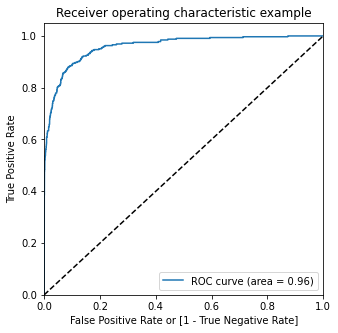

In [172]:
draw_roc(y_train_pred_final['Personal Loan'],y_train_pred_final['Personal Loan_Prob'])

### Step 10: Finding Optimal Cutoff Point

In [173]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final['Personal Loan_Prob'].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Personal Loan,Personal Loan_Prob,ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.000098,4966,0,1,0,0,0,0,0,0,0,0,0
1,0,0.000124,4086,0,1,0,0,0,0,0,0,0,0,0
2,0,0.044890,2881,0,1,0,0,0,0,0,0,0,0,0
3,1,0.983722,1237,1,1,1,1,1,1,1,1,1,1,1
4,0,0.003184,1429,0,1,0,0,0,0,0,0,0,0,0


In [174]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix


In [175]:
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final['Personal Loan'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.092000  1.000000  0.000000
0.1   0.1  0.897714  0.891304  0.898364
0.2   0.2  0.933143  0.807453  0.945878
0.3   0.3  0.948286  0.748447  0.968534
0.4   0.4  0.951714  0.692547  0.977974
0.5   0.5  0.953429  0.633540  0.985840
0.6   0.6  0.954571  0.583851  0.992133
0.7   0.7  0.954000  0.521739  0.997797
0.8   0.8  0.948286  0.444099  0.999371
0.9   0.9  0.938571  0.335404  0.999685


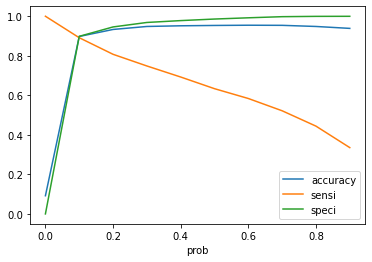

In [176]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.1 is the optimum point to take it as a cutoff probability.

In [177]:
y_train_pred_final['final_predicted'] = y_train_pred_final['Personal Loan_Prob'].map( lambda x: 1 if x > 0.1 else 0)

y_train_pred_final.head()

,Personal Loan,Personal Loan_Prob,ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.000098,4966,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.000124,4086,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.044890,2881,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.983722,1237,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.003184,1429,0,1,0,0,0,0,0,0,0,0,0,0


In [178]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final['Personal Loan'], y_train_pred_final.final_predicted)

0.8977142857142857

In [179]:
confusion2 = metrics.confusion_matrix(y_train_pred_final['Personal Loan'], y_train_pred_final.final_predicted )
confusion2

array([[2855,  323],
       [  35,  287]], dtype=int64)

In [180]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [181]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8913043478260869

In [182]:
# Let us calculate specificity
TN / float(TN+FP)

0.8983637507866583

In [183]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.10163624921334173


In [184]:
# Positive predictive value 
print (TP / float(TP+FP))

0.4704918032786885


In [185]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9878892733564014


## Precision and Recall

In [186]:
#Looking at the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final['Personal Loan'], y_train_pred_final.predicted )
confusion

array([[3133,   45],
       [ 118,  204]], dtype=int64)

##### Precision
TP / TP + FP

In [187]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8192771084337349

##### Recall
TP / TP + FN

In [188]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6335403726708074

Using sklearn utilities for the same

In [189]:
from sklearn.metrics import precision_score, recall_score

In [190]:
?precision_score
precision_score(y_train_pred_final['Personal Loan'], y_train_pred_final.predicted)

0.8192771084337349

In [191]:
recall_score(y_train_pred_final['Personal Loan'], y_train_pred_final.predicted)

0.6335403726708074

### Precision and recall tradeoff

In [192]:
from sklearn.metrics import precision_recall_curve

In [193]:
y_train_pred_final['Personal Loan'], y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       0
        ..
 3495    0
 3496    0
 3497    0
 3498    0
 3499    0
 Name: Personal Loan, Length: 3500, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       0
        ..
 3495    0
 3496    0
 3497    0
 3498    0
 3499    0
 Name: predicted, Length: 3500, dtype: int64)

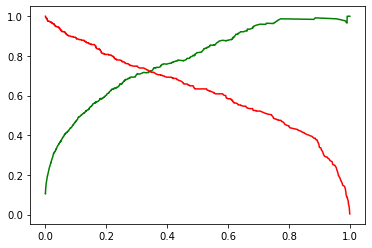

In [194]:
p, r, thresholds = precision_recall_curve(y_train_pred_final['Personal Loan'], y_train_pred_final['Personal Loan_Prob'])
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Step 11: Making predictions on the test set

In [195]:
X_test[['Age','Experience','Income','CCAvg','Mortgage']] = scaler.transform(X_test[['Age','Experience','Income','CCAvg','Mortgage']])
#X_train[['Age','Experience','Income','CCAvg','Mortgage']] = scaler.fit_transform(X_train[['Age','Experience','Income','CCAvg','Mortgage']])

In [196]:
X_test = X_test[col]
X_test.head()

,Experience,Income,Family,Education,Securities Account,CD Account,Online,CreditCard
789,-1.502399,-0.926353,4,2,0,0,1,0
2507,1.214983,-0.292861,4,1,0,0,1,1
2376,1.127325,-1.101109,3,1,0,0,0,0
1378,0.776695,-0.860819,4,3,0,0,1,0
598,0.952010,-1.363244,2,3,0,0,0,0


In [197]:
X_test_sm = sm.add_constant(X_test)

In [198]:
y_test_pred = res.predict(X_test_sm)

In [199]:
y_test_pred[:10]

789     0.001218
2507    0.000766
2376    0.000265
1378    0.014080
598     0.002377
1589    0.064680
2580    0.075928
366     0.001757
2320    0.202958
1247    0.000126
dtype: float64

In [200]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [201]:
# Let's see the head
y_pred_1.head()

,0
789,0.001218
2507,0.000766
2376,0.000265
1378,0.014080
598,0.002377


In [202]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [203]:
# Putting ID to index
y_test_df['ID'] = y_test_df.index

In [204]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [205]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [206]:
y_pred_final.head()

,Personal Loan,ID,0
0,0,789,0.001218
1,0,2507,0.000766
2,0,2376,0.000265
3,0,1378,0.014080
4,0,598,0.002377


In [207]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Personal Loan_Prob'})

In [208]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['ID','Personal Loan','Personal Loan_Prob'], axis=1)

In [209]:
# Let's see the head of y_pred_final
y_pred_final.head()

,ID,Personal Loan,Personal Loan_Prob
0,789,0,0.001218
1,2507,0,0.000766
2,2376,0,0.000265
3,1378,0,0.014080
4,598,0,0.002377


In [210]:
y_pred_final['final_predicted'] = y_pred_final['Personal Loan_Prob'].map(lambda x: 1 if x > 0.42 else 0)

In [211]:
y_pred_final.head()

,ID,Personal Loan,Personal Loan_Prob,final_predicted
0,789,0,0.001218,0
1,2507,0,0.000766,0
2,2376,0,0.000265,0
3,1378,0,0.014080,0
4,598,0,0.002377,0


In [212]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final['Personal Loan'], y_pred_final.final_predicted)

0.94

In [213]:
confusion2 = metrics.confusion_matrix(y_pred_final['Personal Loan'], y_pred_final.final_predicted )
confusion2

array([[1314,   28],
       [  62,   96]], dtype=int64)

In [214]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [215]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6075949367088608

In [216]:
# Let us calculate specificity
TN / float(TN+FP)

0.9791356184798807